# stage1_443076_m1 lick rates

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import cv2
from PIL import Image
import plotly.express as px
import imagecodecs
from matplotlib.animation import FuncAnimation
import tkinter as tk
from tkinter import filedialog
import os

from functions_lick_rates import (licked_txt,
                                    load_files_from_folder,
                                    select_folder,
                                    licking,
                                    plot_array)

In [2]:
stage = "stage1"
folder = select_folder(stage)
file_data, directory = folder[0], folder[1]
lick_rate = licking(file_data, stage)

Selected folder: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage1_443076_m1/data_files
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage1_443076_m1/data_files\443076_m1_stage1_day1_2024-02-13_15-01-31_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage1_443076_m1/data_files\443076_m1_stage1_day2_2024-02-14_16-27-01_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage1_443076_m1/data_files\443076_m1_stage1_day3_2024-02-15_14-07-43_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage1_443076_m1/data_files\443076_m1_stage1_day4_2024-02-16_10-08-44_data.txt
Loading file: X:/Raymond Lab/1_Kai/2_Pi_data/1_first_cohort/443076/stage1_443076_m1/data_files\443076_m1_stage1_day5_2024-02-17_13-21-09_data.txt
Processing complete.
Stage 1 day 1 reached a lick rate of 61.0%
Stage 1 day 2 reached a lick rate of 100.0%
Stage 1 day 3 reached a lick rate of 100.0%
Stage 1 day 4 reache

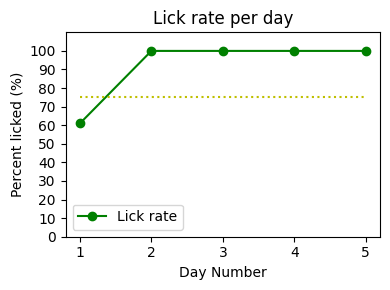

In [3]:
mouseID = directory.split('/')[6]
export_path = f"X:/Raymond Lab/1_Kai/3_processed_data/3_lick_rates/{stage}/{mouseID}.png"
plot = plot_array(sorted(lick_rate),stage, export_path)

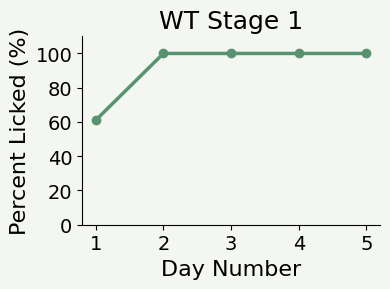

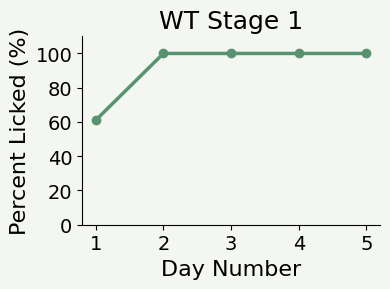

In [5]:
def plot_total(array, stage, export_path_total=None):
    # Extract x and y values from the array
    x_values = [row[0] for row in array]
    if stage == "stage2":
        y_values = [row[3] for row in array]
    elif stage == "stage3":
        y_values = [row[7] for row in array]
    else:
        y_values = [row[1] for row in array]

    # Create the figure and axes
    fig, ax = plt.subplots(figsize=(4, 3))
    
    # Change the figure and axes background colors
    fig.patch.set_facecolor('#F3F6F1')
    ax.set_facecolor('#F3F6F1')

    # Plot the data
    ax.plot(x_values, y_values, marker='o', linestyle='-', color='#589370', label='Lick rate', linewidth=2.5)
    # Add the threshold line
    #threshold = np.zeros(len(array)) + 75
    #ax.plot(x_values, threshold, linestyle='dotted', color='y', label='Threshold')

    # Add labels and title
    ax.set_xlabel('Day Number')
    ax.set_ylabel('Percent Licked (%)')
    ax.set_title('WT Stage 1', fontsize=18)
    
    # Set y-axis limit and ticks
    y_max = 110
    y_ticks = np.linspace(0, 100, num=6)
    ax.set_ylim(0, y_max)
    ax.set_yticks(y_ticks)
    ax.spines['top'].set_visible(False) #hides the top spine.
    ax.spines['right'].set_visible(False) #hides the right spine.
    
    # Set x-axis ticks
    x_ticks = np.linspace(1, len(x_values), num=5, dtype=int)  # Set ticks based on the number of data points
    ax.set_xticks(x_ticks)
    ax.set_xlabel('Day Number', fontsize=16)
    ax.set_ylabel('Percent Licked (%)', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)


    # Add legend and grid
    #ax.legend()
    #ax.grid(False, which='both', linestyle='--', linewidth=0.5)

    plt.tight_layout()
    
    if export_path_total:
        plt.savefig(export_path_total)  # Save the plot if a save path is provided
    else:
        plt.show()
        
    return fig

plot_total(sorted(lick_rate),stage, export_path)